#For next week, please do the following:

1. Analyze ALL features
2. For each feature, decide if it is discrete or continuous
3. If it's discrete: find the count for each value (ex: 22 males and 25 females)
4. If it's continuous: find the min, max, mean, and std
5. For each feature, make at least one plot (histogram is always a great place to start, could do stacked histogram showing survived and not survived for titanic)


#For this month: Please work through these 12 plots and try 3 a week

        Box plot
        Histogram
        Multi-vari chart
        Run chart
        Pareto chart
        Scatter plot
        Stem-and-leaf plot
        Parallel coordinates
        Odds ratio
        Targeted projection pursuit
        Glyph-based visualization methods such as PhenoPlot[9] and Chernoff faces
        Principal component analysis (PCA)


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
int(len(data.columns))

12

In [6]:
## There are 12 columns/features within the dataset. 

In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.Age.shape

(891,)

In [10]:
data.Survived.shape

(891,)

### Looking into all features: 

##### Checking if individual features are descrete or continuous. 

#### Feature 01: 

PassengerId

In [11]:
data.PassengerId.head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

This feature is clearly a continuous  feature. The purpose of this feature seems to identify the passenger by a number. 

In [12]:
data.PassengerId.value_counts().head()

891    1
293    1
304    1
303    1
302    1
Name: PassengerId, dtype: int64

In [13]:
data.PassengerId.describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

### Feature 02: 

Survived

This feature is the target vector. 

In [14]:
data.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

This feature is definetely a discrete, since it only displays survived = 1 and not survived =2

In [15]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

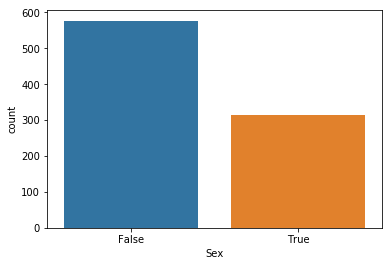

In [20]:
sns.countplot(x=data.Sex == 'female')

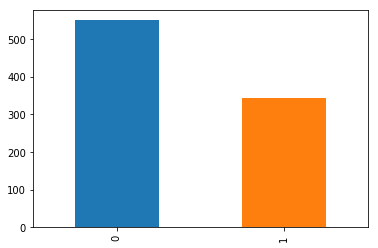

In [19]:
data.Survived.value_counts().plot(kind = 'bar')

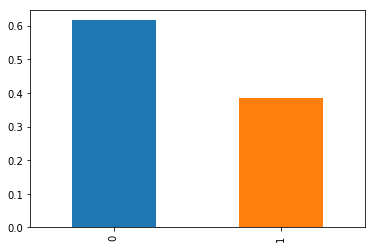

In [20]:
data.Survived.value_counts(normalize = True).plot(kind = 'bar')

#### Feature 03:

Pclass

In [84]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

This feature I thought was interesting interms of deciding descrete vs continuous, because it has 3 values. However, I clearly think that this is a discrete feature, just because This cannot be called continuous. 

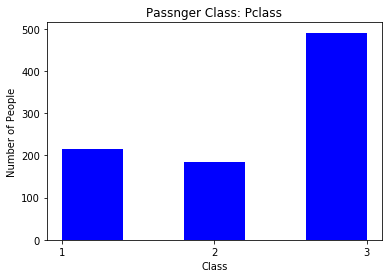

In [85]:
### Histogram
# The histogram below shows the number of Passengers in each class.

plt.hist(data.Pclass,bins=5,color='Blue')

plt.title('Passnger Class: Pclass')
plt.xlabel('Class')
plt.ylabel('Number of People')
plt.xticks([1,2,3])
plt.show()

As we would expect, there are more people travelling in 3rd class. What is interesing is that there are more pepole in 1st class than 2nd

### feature 04: 

Name

This feature shows the names of the passengers. 

In [86]:
data.Name.value_counts().sum()

891

In [87]:
data.Name.nunique()

891

This feature is a continuous feature, because each and every observation(name) in the feature are unique. 

In [88]:
data.Name.isna().sum()

0

In [49]:
data.Name.describe()

count                                   891
unique                                  891
top       Williams, Mr. Howard Hugh "Harry"
freq                                      1
Name: Name, dtype: object

### Feature 05:

Sex

In [89]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

This feature is clearly a discrete feature since it has only 2 values(male or female)

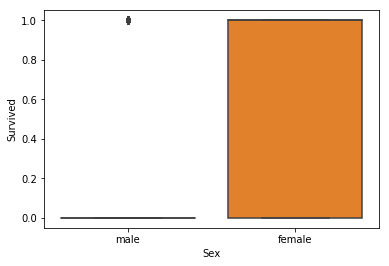

In [152]:
sns.boxplot(x='Sex', y ='Survived',data = data)

In [108]:
data.groupby(data.Sex).Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

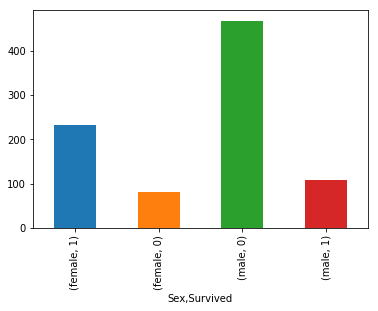

In [150]:
data.groupby(data.Sex).Survived.value_counts().plot(kind = 'bar')

In [111]:
data.groupby(data.Sex).Survived.value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

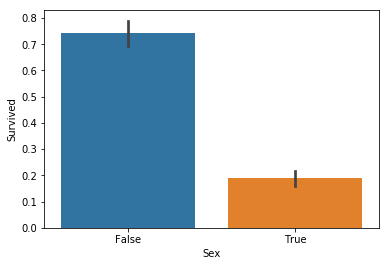

In [21]:
sns.barplot(x=data.Sex == 'male',y=data.Survived)

In [158]:
data.groupby(data.Sex == 'female').Survived.value_counts()

Sex    Survived
False  0           468
       1           109
True   1           233
       0            81
Name: Survived, dtype: int64

In [266]:
data.groupby(data.Sex).Survived.value_counts(normalize = True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

### Feature 6

Age

This is another continuous feature. 

In [14]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The very first thing I see is that there are missing values. 

In [7]:
data.Age.isna().sum()

177

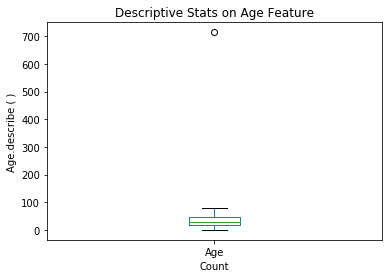

In [29]:
#### The chart below is displayed very small. The next chart has it adjusted. 

plt.xlabel('Count')
plt.ylabel('Age.describe ( )')
plt.title('Descriptive Stats on Age Feature')

data.Age.describe().plot(kind='box')

plt.show()

In [30]:
###### Exclude the count.... from the above plot and re plot

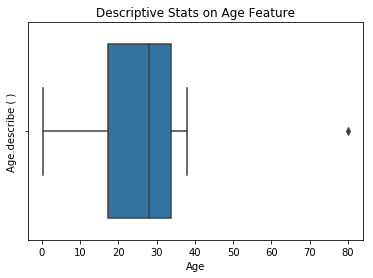

In [34]:
plt.xlabel('Count')
plt.ylabel('Age.describe ( )')
plt.title('Descriptive Stats on Age Feature')

ax = sns.boxplot(data.Age.describe().drop('count'),whis=2,orient='h')

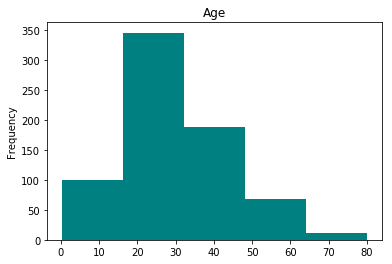

In [36]:
data.Age.plot.hist(title = 'Age', bins = 5,color = 'teal')

plt.show()

### Feature 7:

SibSp

In [91]:
data.SibSp.head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [97]:
data.SibSp.unique().sum()

23

In [101]:
data.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [124]:
data.SibSp.value_counts(dropna=False,)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

This feature contains unique values, therefore, I determine this is a continuous variable. 

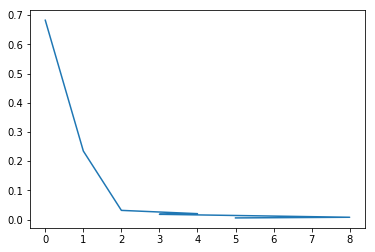

In [126]:
plt.plot(data.SibSp.value_counts(normalize=True))

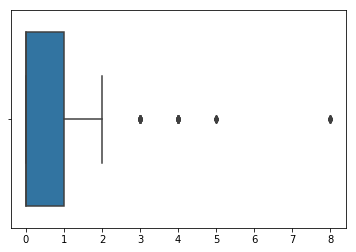

In [127]:
sns.boxplot(data.SibSp.values,whis=1)

### Feature 8

Parch

In [129]:
data.Parch.sum()

340

In [130]:
data.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

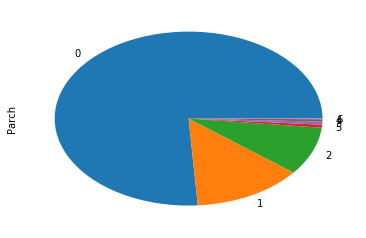

In [161]:
data.Parch.value_counts().plot(kind='pie')

plt.show()

This is s continuous variable. 

### Feature 9 

Ticket

In [145]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [146]:
data.Ticket.values

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572',
       '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651',
       'CA 2144', '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'CA 2144', 'S.O.C. 14879', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059',

In [4]:
data.Ticket.value_counts()


##### Clean it up

    # time....
    # Dummy for time..........

1601                 7
347082               7
CA. 2343             7
3101295              6
347088               6
CA 2144              6
S.O.C. 14879         5
382652               5
W./C. 6608           4
19950                4
4133                 4
PC 17757             4
113760               4
17421                4
2666                 4
113781               4
349909               4
LINE                 4
347077               4
239853               3
248727               3
230080               3
363291               3
371110               3
PC 17582             3
35273                3
PC 17760             3
345773               3
F.C.C. 13529         3
13502                3
                    ..
368703               1
350034               1
243880               1
315037               1
17465                1
349233               1
113059               1
19952                1
347074               1
350035               1
9234                 1
PC 17759             1
31028      

Clearly a continuous variable. 

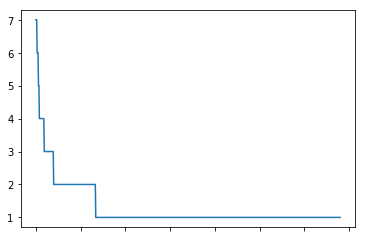

In [163]:
data.Ticket.value_counts().plot()

plt.show()

In [164]:
data.Ticket.describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

This is also a continuouse varuable 

### feature 10: 

Fare

In [175]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

This is definetely a continuouse variable 

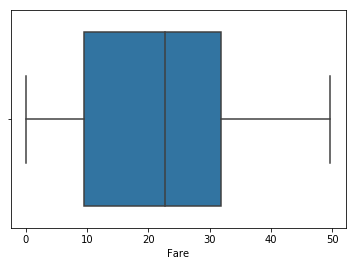

In [57]:
sns.boxplot(data.Fare.describe().drop(['count','max']))

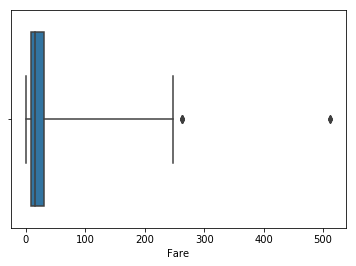

In [280]:
#### histogram......

##### break up the ranges...
        # low
        # high
        # mid ----- Dummy variables would b good ----- compare with the classes variables (under, over pay)

ax = sns.boxplot(data.Fare,whis=10,orient='h')

In [278]:
data.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

### Feature 11:

Cabin

In [211]:
# try to guess the cabin......... check the picture 


data.Cabin.value_counts(dropna=False)

NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
D                3
F2               3
F33              3
C22 C26          3
B58 B60          2
C78              2
B28              2
D35              2
F G73            2
B35              2
B20              2
D36              2
C83              2
C125             2
D20              2
B77              2
C123             2
C126             2
E24              2
E25              2
D33              2
D17              2
B22              2
B49              2
B18              2
              ... 
E63              1
C87              1
C50              1
D47              1
A34              1
F38              1
D45              1
A20              1
B38              1
A36              1
T                1
E34              1
D10 D12          1
C54              1
A32              1
A7               1
D6               1
D11              1
E12              1
A19              1
D50              1
B4          

In [212]:
data.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

This is also a continuous variable

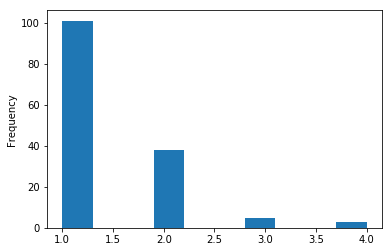

In [218]:
data.Cabin.value_counts().plot(kind='hist')

### Feature 12: 

Embarked

In [281]:
##### Try to predict the survival of each point............ 
        ##### 


data.loc[:,'Embarked']

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [224]:
data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [225]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [227]:
data.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

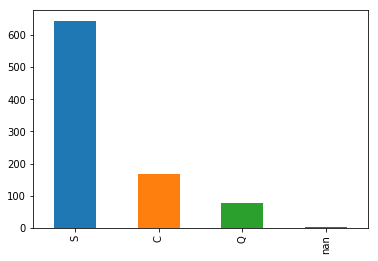

In [233]:
data.Embarked.value_counts(dropna=False).plot(kind = 'bar')

As we can see this variable has NaN values and this variable is a continuouse feature. 